# SVM for Facial Matching. #

Doing Support Vector Machine (SVM) regression on a subset of Cropped Yale face data. Data consists 
of 39 subjects, each with 65 greyscale images taken under different lighting conditions, then cropped
to 192 x 168 pixels.

There is an image of size 640 x 480 pixels in each folder. This "ambient" image messed my program up for a week before I realized it was there. My program assumes all the face images are 192 x 168. Modified my program to exclude this "ambient" image.

You can download the data set here:
http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html


---
Importing libraries and going into the */CroppedYale* directory:

In [1]:
import os
import glob
#change into the CroppedYale directory
os.chdir('CroppedYale')

Loading up the data files. See the code comments.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#listing all the subdirectories in CroppedYale
subdir = os.listdir()

filename = []
image = []
target_name = []

#length of the array
PJG = 192*168


k=0
#for each subdirectory
for i in subdir:
    #listing all the pgm filenames in each subdirectory
    s = glob.glob(i +'/*.pgm')
    #pick a filename in the list of filenames
    for file in s:
        #read an image using a filename
        img = plt.imread(file)
        #exclude the bloody "ambient" image. Only process the 192x168 images!
        if np.shape(img)== (192,168):
            #append the filename to a lsit of filenames
            filename += [file]
            #append the subdir name to a list of subdir names. This will be the training target
            target_name += [i]
            #append image to a list of images
            image += [img]
            #flatten image to 1D and append the flattened image to a data array.
            #sklearn only uses data like that
            if k == 0:
                #create array during the first iteration
                data = np.array( [img.flatten()] )
                k =1
            else:
                #append flattened image to already created data array
                data = np.append(data, [img.flatten()], axis =0)    
                
            
            
            
        
print(np.shape(data))

(2424, 32256)


In [3]:
np.shape(target_name), np.shape(data)

((2424,), (2424, 32256))

Sklearn's support vector machine library.

*train_test_split* is a function that splits your data and targets into:
- data and targets used for training
- data and targets used for testing




In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split

Split the data sets: 
- 25% of data used for training, as *train_data*
- 25% of target_name for training as *train_target_name*
- 75% of data used for testing, as *test_data*
- 75% of target_name for testing as *test_target_name*

Yes! Only 25% of data set used for training.

75% for testing.

In [5]:
train_data, test_data, train_target_name, test_target_name = train_test_split(data, target_name, test_size = 0.75, shuffle =True)

In [6]:
np.shape(train_data), np.shape(test_data)

((606, 32256), (1818, 32256))

Creating a support vector machine called *mesin* and training it using the *train_data* and *train_target_name*.

In [7]:
mesin = svm.SVC(kernel = 'linear', C = 0.01)
mesin.fit(train_data, train_target_name)


SVC(C=0.01, kernel='linear')

After training the *mesin*, try it out using the *test_data*. It will return a list of directory names *ramal* which the machine thinks each row of *test_data* belongs to.

For example, *test_data[25]* matches to *yaleB24*.

In [8]:

ramal = mesin.predict(test_data)

List the folder names predicted by the SVM vs correct answer. 

Calculate percentage of predicted == correct answer

In [12]:
true_count = 0
for i in range(1818): 
    if i%100 ==0:
        print(ramal[i], test_target_name[i], ramal[i]==test_target_name[i])
    if ramal[i]==test_target_name[i]:
        true_count += 1

print('percentage de success=',100*true_count/1818)

yaleB33 yaleB33 True
yaleB19 yaleB19 True
yaleB26 yaleB26 True
yaleB33 yaleB39 False
yaleB22 yaleB22 True
yaleB33 yaleB33 True
yaleB31 yaleB31 True
yaleB07 yaleB28 False
yaleB01 yaleB26 False
yaleB37 yaleB37 True
yaleB01 yaleB01 True
yaleB15 yaleB15 True
yaleB31 yaleB31 True
yaleB15 yaleB15 True
yaleB07 yaleB22 False
yaleB06 yaleB06 True
yaleB13 yaleB13 True
yaleB29 yaleB29 True
yaleB22 yaleB22 True
percentage de success= 81.4081408140814


List the images, what folder the mesin predicted vs a representative of the folder

0


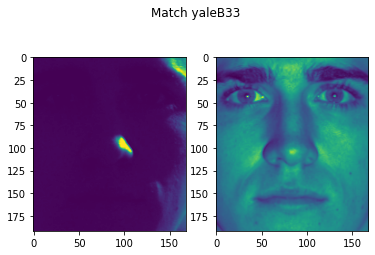

1


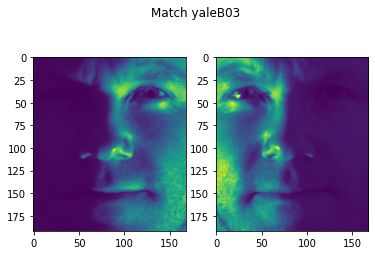

2


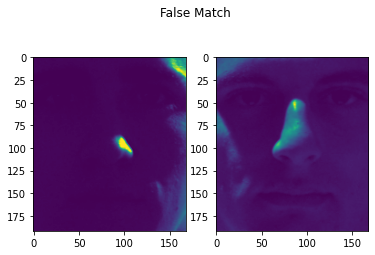

3


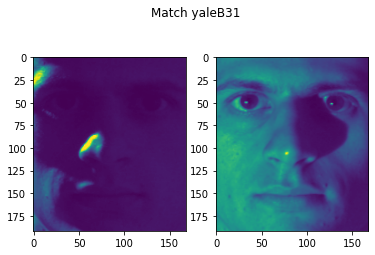

4


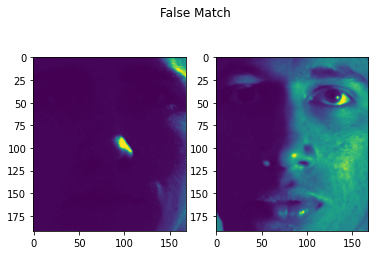

5


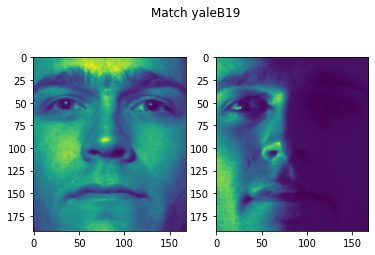

6


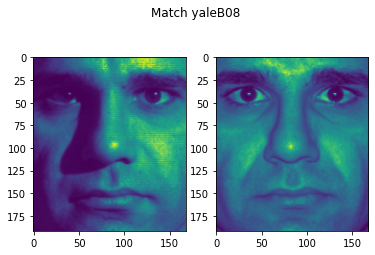

7


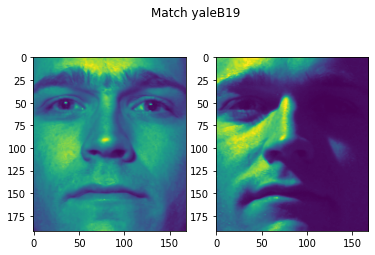

8


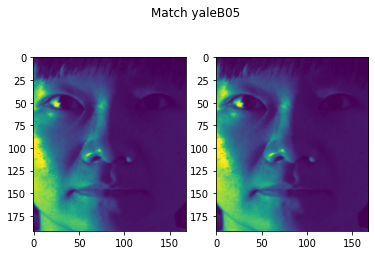

9


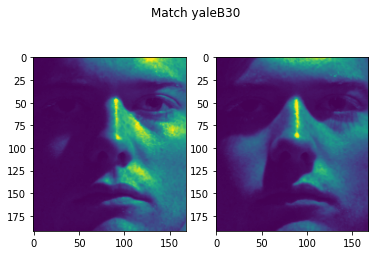

In [11]:
%matplotlib inline
for i in range(10):
    
    if i%1 ==0:
        
        img_predict = plt.imread((glob.glob(ramal[i] + '/*.pgm'))[10])
        
        
        fig = plt.figure()
        
        if ramal[i] == test_target_name[i]:
            fig.suptitle("Match "+ramal[i])
        else:
            fig.suptitle("False Match")
            
        
        plt.subplot(121)
        plt.imshow(img_predict)
        
        plt.subplot(122)
        plt.imshow(test_data[i].reshape((192,168)))
        s = test_target_name
        
        print(i)
        plt.show()